## Import Required libraries 

In [18]:
## Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA



In [3]:
df = pd.read_csv("C:/JUPYTERPROJECTS/Crop_Advisory_system/data/Crop_recommendation.csv")
df.head()



,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
## Feature Selection (Exclude Target)

X = df.drop("label", axis=1)


In [6]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [7]:
## Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


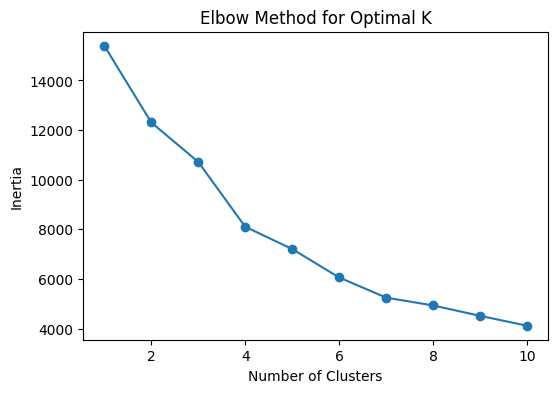

In [8]:
## Elbow Method

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [10]:
## Apply KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label,Cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,8
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,8
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,8
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,8
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,8


In [14]:
## Number of Samples in Each Cluster

df["Cluster"].value_counts().sort_index()


Cluster
0    397
1    342
2    200
3    200
4    141
5    176
6    185
7     95
8    277
9    187
Name: count, dtype: int64

In [15]:
## Number of Unique Crops in Each Cluster

df.groupby("Cluster")["label"].nunique()


Cluster
0    8
1    5
2    2
3    2
4    4
5    3
6    3
7    1
8    5
9    4
Name: label, dtype: int64

In [17]:
## Show Crops Present in Each Cluster

for i in range(10):
    crops_in_cluster = df[df["Cluster"] == i]["label"].unique()
    print(f"\nCluster {i} contains {len(crops_in_cluster)} crops:")
    print(crops_in_cluster)



Cluster 0 contains 8 crops:
['pigeonpeas' 'mothbeans' 'mungbean' 'blackgram' 'lentil' 'mango' 'orange'
 'papaya']

Cluster 1 contains 5 crops:
['maize' 'banana' 'papaya' 'cotton' 'coffee']

Cluster 2 contains 2 crops:
['watermelon' 'muskmelon']

Cluster 3 contains 2 crops:
['grapes' 'apple']

Cluster 4 contains 4 crops:
['chickpea' 'kidneybeans' 'pigeonpeas' 'lentil']

Cluster 5 contains 3 crops:
['pomegranate' 'orange' 'coconut']

Cluster 6 contains 3 crops:
['pigeonpeas' 'mothbeans' 'mango']

Cluster 7 contains 1 crops:
['chickpea']

Cluster 8 contains 5 crops:
['rice' 'pigeonpeas' 'papaya' 'jute' 'coffee']

Cluster 9 contains 4 crops:
['pigeonpeas' 'orange' 'papaya' 'coconut']


In [11]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,Cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,8
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,8
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,8
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,8
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,8
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,8
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,1
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,8
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,1


In [12]:
## Silhouette Score

score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.3425703604479961


In [13]:
## Cluster vs Crop Distribution

pd.crosstab(df["Cluster"], df["label"])


label,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0,0,100,0,0,0,0,0,0,0,...,11,58,100,0,2,20,10,0,0,0
1,0,100,0,0,0,36,100,0,0,0,...,0,0,0,0,0,6,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,100,0,0,0,0,0,100
3,100,0,0,0,0,0,0,100,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,5,0,0,0,0,0,100,...,0,0,0,0,0,0,32,0,0,0
5,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,71,0,0,100,0,0
6,0,0,0,0,0,0,0,0,0,0,...,89,42,0,0,0,0,54,0,0,0
7,0,0,0,95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,64,0,0,100,0,...,0,0,0,0,0,12,1,0,100,0


In [19]:
## PCA for Visualization

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]


In [20]:
cluster_sizes = df["Cluster"].value_counts().sort_index()


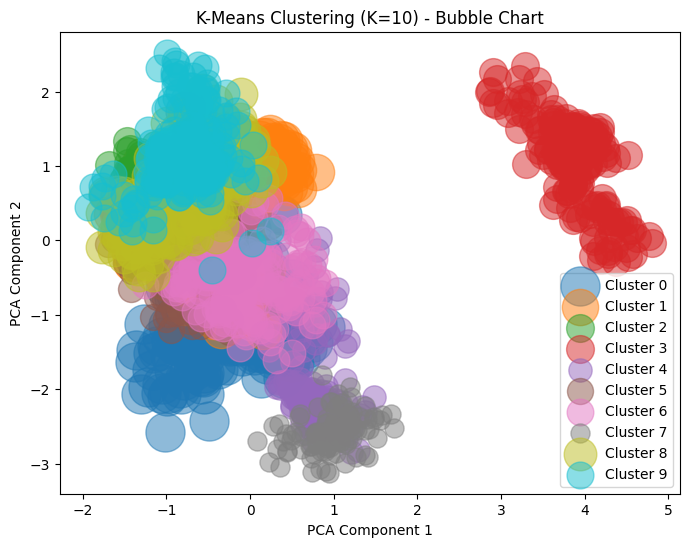

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

for cluster in range(10):
    cluster_data = df[df["Cluster"] == cluster]
    
    plt.scatter(
        cluster_data["PCA1"],
        cluster_data["PCA2"],
        s=len(cluster_data)*2,  # bubble size
        alpha=0.5,
        label=f"Cluster {cluster}"
    )

plt.title("K-Means Clustering (K=10) - Bubble Chart")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


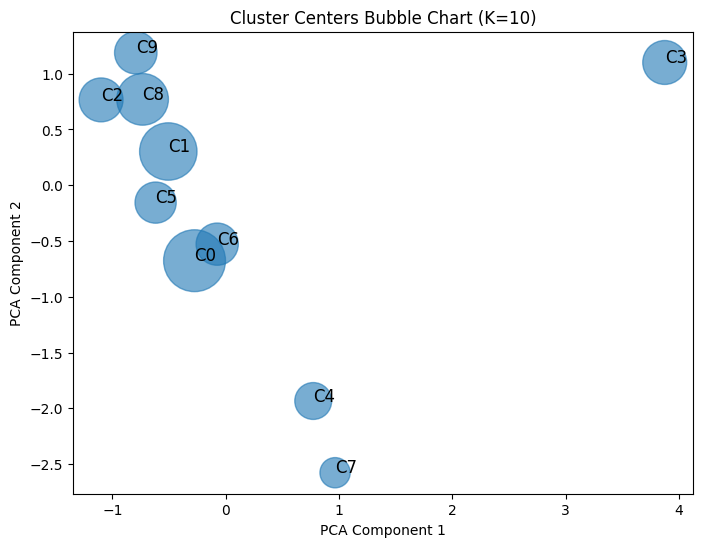

In [24]:
plt.figure(figsize=(8,6))

centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)

plt.scatter(
    centers_pca[:, 0],
    centers_pca[:, 1],
    s=cluster_sizes.values*5,
    alpha=0.6
)

for i in range(10):
    plt.text(centers_pca[i, 0], centers_pca[i, 1], f"C{i}", fontsize=12)

plt.title("Cluster Centers Bubble Chart (K=10)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [25]:
## Cluster vs Crop Distribution Table

cluster_crop_table = pd.crosstab(df["Cluster"], df["label"])

cluster_crop_table


label,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0,0,100,0,0,0,0,0,0,0,...,11,58,100,0,2,20,10,0,0,0
1,0,100,0,0,0,36,100,0,0,0,...,0,0,0,0,0,6,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,100,0,0,0,0,0,100
3,100,0,0,0,0,0,0,100,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,5,0,0,0,0,0,100,...,0,0,0,0,0,0,32,0,0,0
5,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,71,0,0,100,0,0
6,0,0,0,0,0,0,0,0,0,0,...,89,42,0,0,0,0,54,0,0,0
7,0,0,0,95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,64,0,0,100,0,...,0,0,0,0,0,12,1,0,100,0
